Before start, make sure that you choose

*   Python>=3.6
*   PyTorch>=1.7.1
*   CUDA>=10.0
*   CUDA Driver>=440
*   GCC>=4.9

in the Runtime menu --> Change runtime type

First, we clone the repository.

In [ ]:
# clone the repository
%cd /content
!rm -rf GPEN
!git clone https://github.com/yangxy/GPEN.git
%cd GPEN

/content
Cloning into 'GPEN'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (218/218), done.
remote: Total 255 (delta 47), reused 231 (delta 28), pack-reused 0
Receiving objects: 100% (255/255), 47.87 MiB | 23.68 MiB/s, done.
Resolving deltas: 100% (47/47), done.
/content/GPEN


Then, we set up the environment. 

In [ ]:
# set up the environment 
!pip install -r requirements.txt

Download the pre-trained models and put them in ./weights.

In [ ]:
# download our pre-trained models
!wget https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/RetinaFace-R50.pth -O weights/RetinaFace-R50.pth
!wget https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-512.pth -O weights/GPEN-BFR-512.pth
!wget https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-256.pth -O weights/GPEN-BFR-256.pth

--2021-10-11 04:45:13--  https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/RetinaFace-R50.pth
Resolving public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-vigen-video.oss-cn-shanghai.aliyuncs.com)... 47.101.88.25
Connecting to public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-vigen-video.oss-cn-shanghai.aliyuncs.com)|47.101.88.25|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109497761 (104M) [application/octet-stream]
Saving to: ‘weights/RetinaFace-R50.pth’

weights/RetinaFace- 100%[===================>] 104.42M  8.18MB/s    in 26s     

2021-10-11 04:45:42 (3.96 MB/s) - ‘weights/RetinaFace-R50.pth’ saved [109497761/109497761]

--2021-10-11 04:45:42--  https://public-vigen-video.oss-cn-shanghai.aliyuncs.com/robin/models/GPEN-BFR-512.pth
Resolving public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-vigen-video.oss-cn-shanghai.aliyuncs.com)... 47.101.88.25
Connecting to public-vigen-video.oss-cn-shanghai.aliyuncs.com (public-v

Finally, run our model.

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


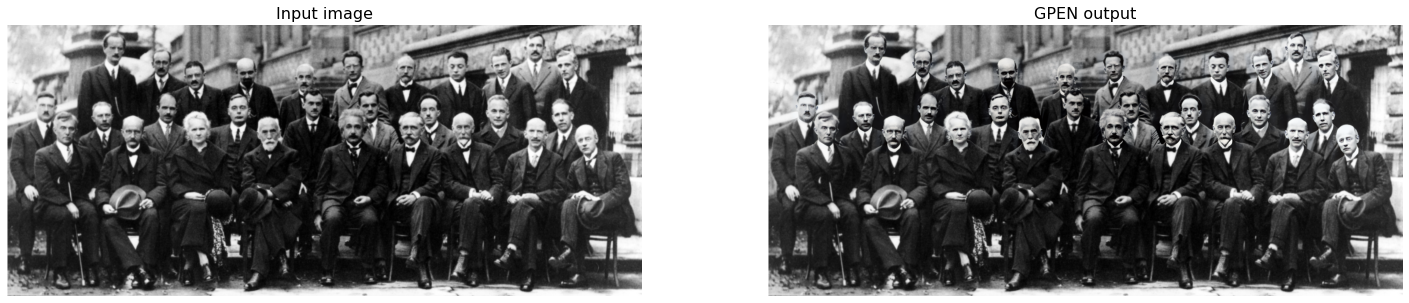

In [ ]:
# enhance faces
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from face_enhancement import FaceEnhancement

def display(img1, img2):
    fig = plt.figure(figsize=(25, 10))
    ax1 = fig.add_subplot(1, 2, 1) 
    plt.title('Input image', fontsize=16)
    ax1.axis('off')
    ax2 = fig.add_subplot(1, 2, 2)
    plt.title('GPEN output', fontsize=16)
    ax2.axis('off')
    ax1.imshow(img1)
    ax2.imshow(img2)

if __name__=="__main__":    
    model = {'name':'GPEN-BFR-512', 'size':512, 'channel_multiplier':2, 'narrow':1}
    #model = {'name':'GPEN-BFR-256', 'size':256, 'channel_multiplier':1, 'narrow':0.5}
    
    indir = 'examples/imgs'
    outdir = 'examples/outs-BFR'
    os.makedirs(outdir, exist_ok=True)

    faceenhancer = FaceEnhancement(size=model['size'], model=model['name'], channel_multiplier=model['channel_multiplier'], narrow=model['narrow'])

    file = os.path.join(indir, 'Solvay_conference_1927.png')
    filename = os.path.basename(file)
    im = cv2.imread(file, cv2.IMREAD_COLOR) # BGR
    im = cv2.resize(im, (0,0), fx=2, fy=2)

    img, orig_faces, enhanced_faces = faceenhancer.process(im)
        
    cv2.imwrite(os.path.join(outdir, '.'.join(filename.split('.')[:-1])+'_COMP.jpg'), np.hstack((im, img)))
    cv2.imwrite(os.path.join(outdir, '.'.join(filename.split('.')[:-1])+'_GPEN.jpg'), img)
        
    for m, (ef, of) in enumerate(zip(enhanced_faces, orig_faces)):
        of = cv2.resize(of, ef.shape[:2])
        cv2.imwrite(os.path.join(outdir, '.'.join(filename.split('.')[:-1])+'_face%02d'%m+'.jpg'), np.hstack((of, ef)))
    
    display(im, img)

Download the results if needed.

In [ ]:
# download the result
from google.colab import files

!ls examples/outs-BFR/
os.system('zip -r BFR-results.zip examples/outs-BFR')
files.download("BFR-results.zip")

Solvay_conference_1927_COMP.jpg    Solvay_conference_1927_face15.jpg
Solvay_conference_1927_face00.jpg  Solvay_conference_1927_face16.jpg
Solvay_conference_1927_face01.jpg  Solvay_conference_1927_face17.jpg
Solvay_conference_1927_face02.jpg  Solvay_conference_1927_face18.jpg
Solvay_conference_1927_face03.jpg  Solvay_conference_1927_face19.jpg
Solvay_conference_1927_face04.jpg  Solvay_conference_1927_face20.jpg
Solvay_conference_1927_face05.jpg  Solvay_conference_1927_face21.jpg
Solvay_conference_1927_face06.jpg  Solvay_conference_1927_face22.jpg
Solvay_conference_1927_face07.jpg  Solvay_conference_1927_face23.jpg
Solvay_conference_1927_face08.jpg  Solvay_conference_1927_face24.jpg
Solvay_conference_1927_face09.jpg  Solvay_conference_1927_face25.jpg
Solvay_conference_1927_face10.jpg  Solvay_conference_1927_face26.jpg
Solvay_conference_1927_face11.jpg  Solvay_conference_1927_face27.jpg
Solvay_conference_1927_face12.jpg  Solvay_conference_1927_face28.jpg
Solvay_conference_1927_face13.jpg 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>